# Preprocessing Hourly Rainfall Data in DAM Upstream 

### 1. Import Required Python Libraries

In [1]:
import pandas as pd
import datetime
from datetime import timedelta
from pylab import rcParams
import seaborn as sns
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

### 2. Read Hourly Rainfall data in Dam Upstream

<div class="alert alert-success">
Read Hourly Rainfall Data that obtained from DAON database system in K-water </div>

In [2]:
obs_folder_name = "YD_DAM_Upstream"
raw_data_folder = os.path.join(os.getcwd(), obs_folder_name, "raw_data")
os.listdir(raw_data_folder)

['YD_DAM_Upstream_WaterLevel_Daily.csv',
 '1_YD_DAM_Upstream_Rainfall_Observation_Periods.csv',
 'YD_DAM_Operation_Data_Daily.csv',
 '2_YD_DAM_Upstream_WaterLevel_Observation.xlsx',
 'YD_DAM_Upstream_WaterLevel_Hourly.csv',
 'YD_DAM_Upstream_Rainfall_Daily.csv',
 'YD_DAM_Operation_Data_Hourly.csv',
 'YD_DAM_Upstream_Rainfall_Hourly.csv']

In [3]:
all_obs_df = pd.read_csv(os.path.join(raw_data_folder, "YD_DAM_Upstream_Rainfall_Hourly.csv"))
all_obs_df.head()

,OBSDH,RFOBSCD,HRRF
0,2020102201,3001410,0.0
1,2020102201,9000193,0.0
2,2020102201,3001415,0.0
3,2020102201,3001442,0.0
4,2020102201,3001440,0.0


<div class="alert alert-success">
Total Rainfall stations in Dam Upstream </div>

In [4]:
all_obs_code = all_obs_df["RFOBSCD"].unique()
all_obs_code

array([3001410, 9000193, 3001415, 3001442, 3001440, 3003430, 2020410,
       8000703, 9000023, 9000025, 9000026, 9000027, 9000028, 9000029,
       9000030, 8000248, 8000757, 8000758, 8000314, 8005715, 8005705,
       8004901, 8004900, 8005224, 8005223, 8005220, 8005254, 8005229,
       8005228, 8005902, 8005906, 8004174, 8005911, 8005913, 8005907,
       8005929])

### 3. Set Rainfall stations considering data observation periods

<div class="alert alert-success">
In Dam Upstream Rainfall stations, we selected the stations with an more than 24 years observation periods. </div>

In [5]:
obs_periods_df = pd.read_csv(os.path.join(raw_data_folder, "1_YD_DAM_Upstream_Rainfall_Observation_Periods.csv"))
obs_periods_df.head()

,RFOBSCD,MAX(OBSDH),MIN(OBSDH),START_YEAR,START_YEAR.1,OBS_PERIODS
0,2020410,2024011619,2004022123,2024,2004,20
1,3001410,2024011619,2004022123,2024,2004,20
2,3001415,2024011619,2004010101,2024,2004,20
3,3001440,2024011619,2004022123,2024,2004,20
4,3001442,2024011619,2008030420,2024,2008,16


In [6]:
code_select = obs_periods_df[obs_periods_df['OBS_PERIODS'] >= 24]
code_select

,RFOBSCD,MAX(OBSDH),MIN(OBSDH),START_YEAR,START_YEAR.1,OBS_PERIODS
5,3003430,2024011619,1979070101,2024,1979,45
28,9000023,2024011619,2000053001,2024,2000,24
29,9000025,2024011619,2000053001,2024,2000,24
30,9000026,2024011619,2000053001,2024,2000,24
31,9000027,2024011619,2000053001,2024,2000,24
32,9000028,2024011619,2000053001,2024,2000,24
33,9000029,2024011619,2000053001,2024,2000,24
34,9000030,2024011619,1997031301,2024,1997,27


In [7]:
obs_code = code_select.RFOBSCD.values
obs_code

array([3003430, 9000023, 9000025, 9000026, 9000027, 9000028, 9000029,
       9000030])

### 4. Set DateTime Data Format and Observation Periods 

<div class="alert alert-success">
Change "datetime data format" from string to Pandas datetime format </div>

In [8]:
def datetime_format(df):
    dt_series = []
    for date in df['OBSDH']:
        day = int(str(date)[6:8])
        time = int(str(date)[8:10])
        if int(str(date)[8:10]) == 24:
            time = 0
            datetimeobj = datetime.datetime(int(str(date)[0:4]), int(str(date)[4:6]), day, 0, 0)
            datetimeobj = datetimeobj + timedelta(days=1)
        else:
            datetimeobj = datetime.datetime(int(str(date)[0:4]), int(str(date)[4:6]), day, time, 0)
        dt_series.append(datetimeobj)
    # date의 날짜를 datetime 포맷으로 변경
    df["date"] = dt_series
    return df

<div class="alert alert-success">
Change "date data format" from string to Pandas datetime format </div>

In [9]:
all_obs_df = datetime_format(all_obs_df)
all_obs_df[0:3]

,OBSDH,RFOBSCD,HRRF,date
0,2020102201,3001410,0.0,2020-10-22 01:00:00
1,2020102201,9000193,0.0,2020-10-22 01:00:00
2,2020102201,3001415,0.0,2020-10-22 01:00:00


<div class="alert alert-success">
Check Observation Periods to create Date Dataframe </div>

In [10]:
all_obs_df["date"].min(), all_obs_df["date"].max()

(Timestamp('1979-07-01 01:00:00'), Timestamp('2024-01-16 20:00:00'))

<div class="alert alert-success">
Create Total Date Periods using Max and Min date above </div>

In [11]:
total_date_df = pd.DataFrame(
    {'date': pd.date_range(start=all_obs_df["date"].min(), end=all_obs_df["date"].max(), freq='1H'),
    }
)
print(len(total_date_df))
total_rf_df = total_date_df
total_date_df.head()

390500


,date
0,1979-07-01 01:00:00
1,1979-07-01 02:00:00
2,1979-07-01 03:00:00
3,1979-07-01 04:00:00
4,1979-07-01 05:00:00


### 5. Preprocessing Hourly Data in Dam Upstream

<div class="alert alert-success">
<b> Create Water Level Dataframe using station codes as columns </div>

In [12]:
for code in obs_code:
    code_data = all_obs_df[all_obs_df['RFOBSCD'] == code]
    total_df = pd.merge(total_rf_df, code_data, on="date", how="left")
    total_rf_df[str(code)+"_hrrf"] = total_df["HRRF"].values
    
total_rf_df_f = total_rf_df.set_index("date")
total_rf_df_f

,3003430_hrrf,9000023_hrrf,9000025_hrrf,9000026_hrrf,9000027_hrrf,9000028_hrrf,9000029_hrrf,9000030_hrrf
date,,,,,,,,
1979-07-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-07-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-01-16 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-16 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-16 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-success">
<b> Select important stations </div>

In [13]:
selected_rf_df_f = total_rf_df_f.loc["2000-10-01":"2023-09-30"]
selected_rf_df_f.head()

,3003430_hrrf,9000023_hrrf,9000025_hrrf,9000026_hrrf,9000027_hrrf,9000028_hrrf,9000029_hrrf,9000030_hrrf
date,,,,,,,,
2000-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-success">
Check Missing Data in stations : Sum of number of missing data is printed below. </div>

In [14]:
print(len(selected_rf_df_f[selected_rf_df_f.isna().any(axis=1)]))

61


<div class="alert alert-success">
Plotting Missing data </div>

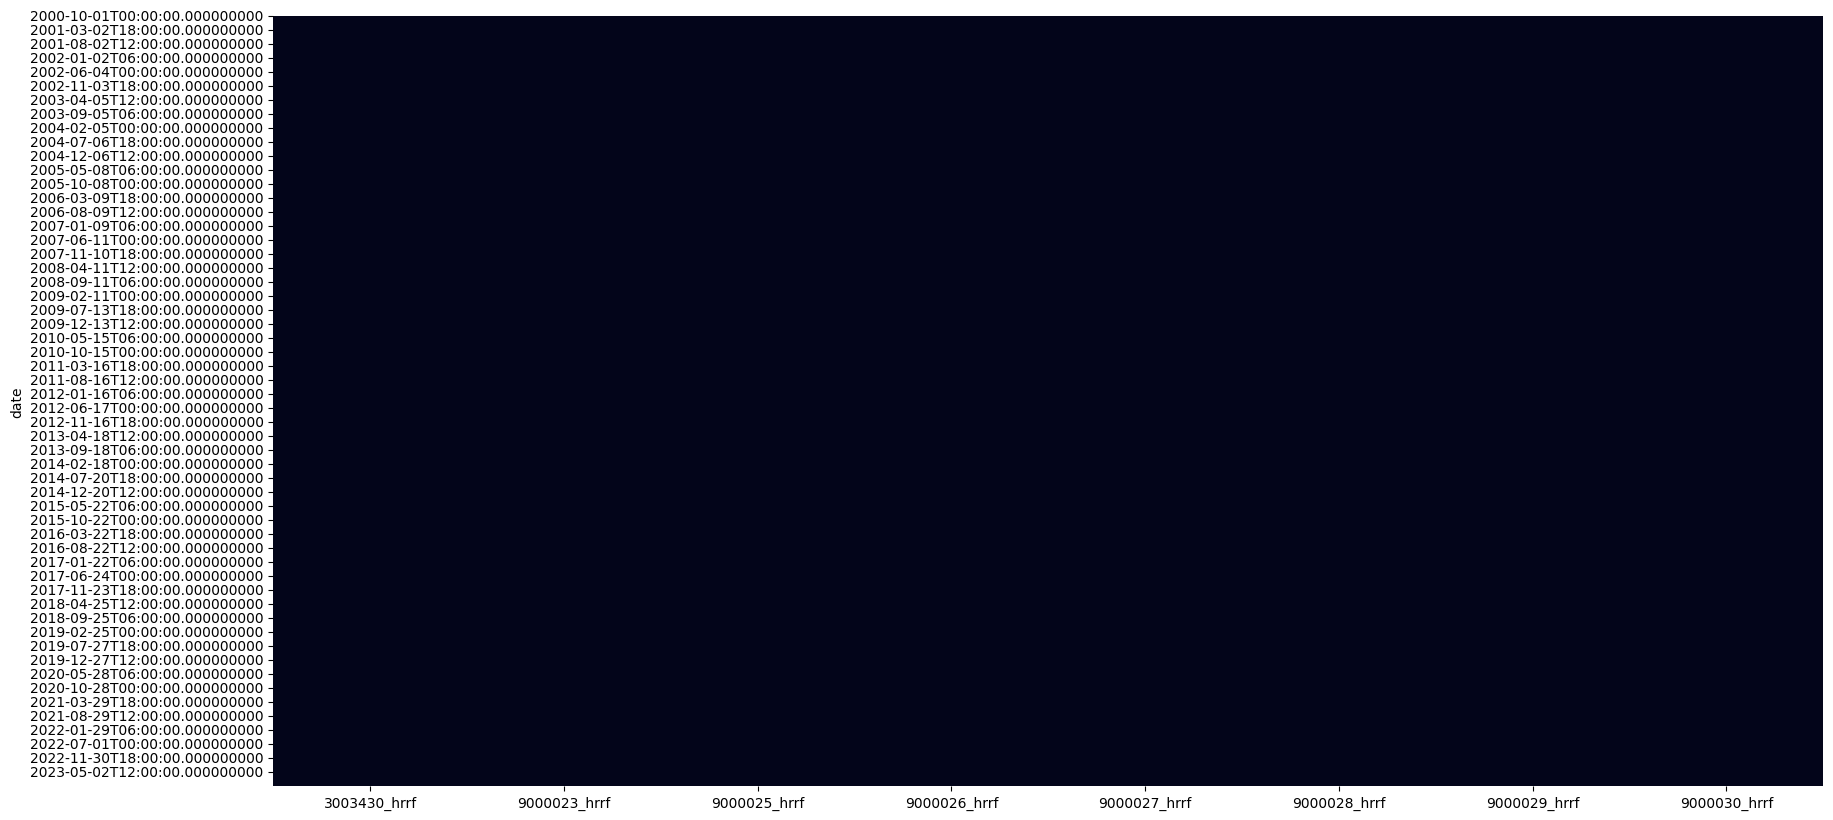

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_rf_df_f.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/hrrf_dam_upstream_missing_hourly.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Plotting Water Level Plot in selected stations </div>

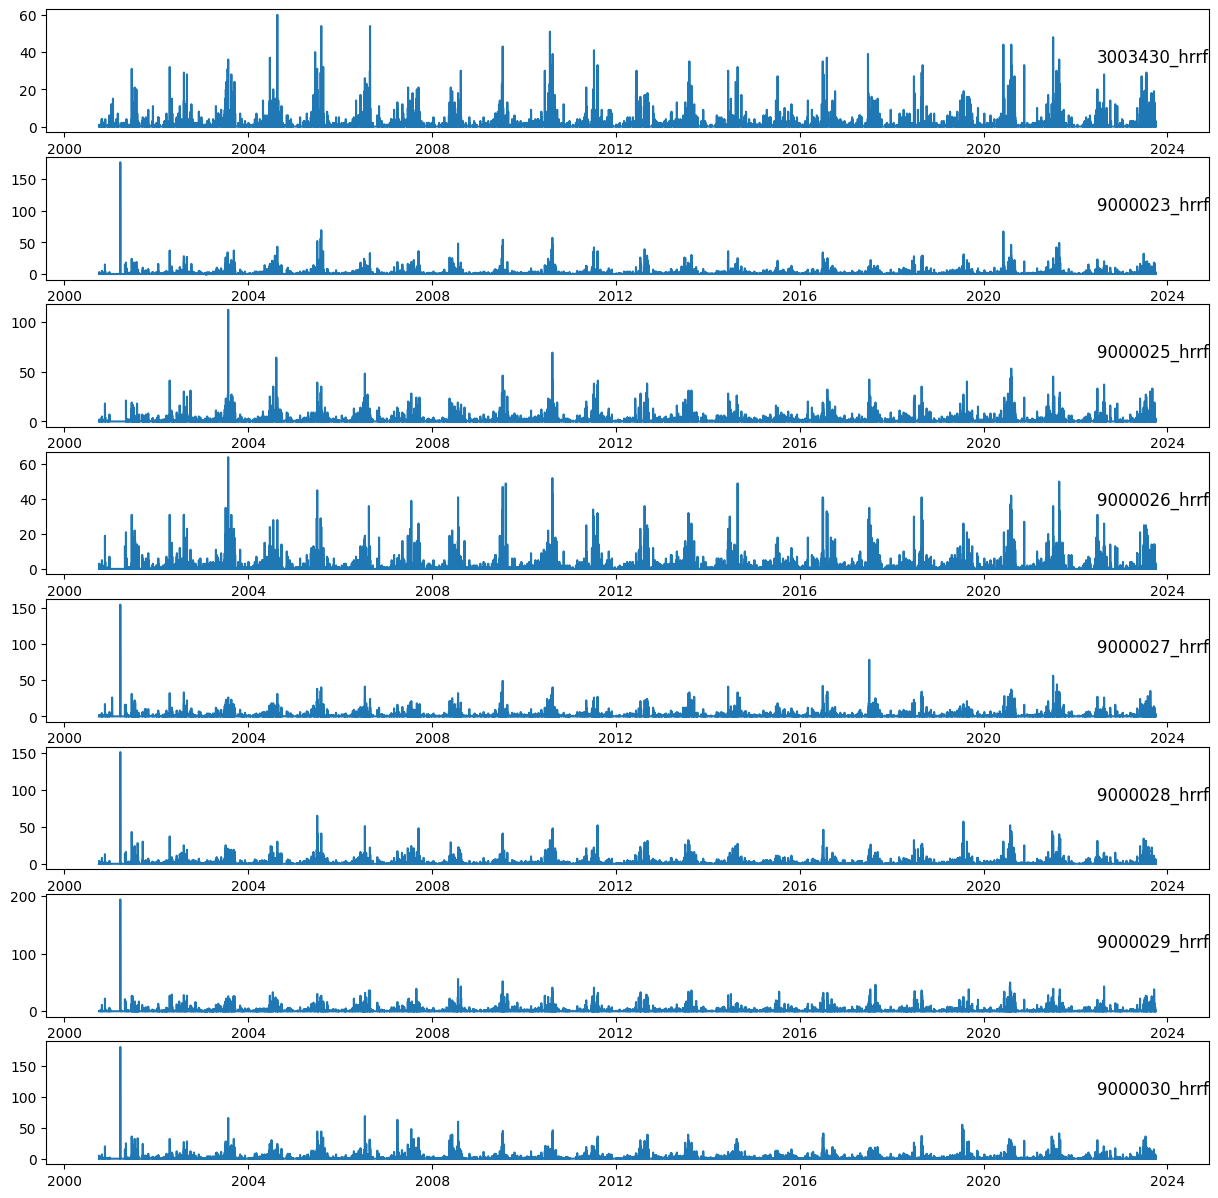

In [16]:
rcParams['figure.figsize'] = 15, 15
values = selected_rf_df_f.values
groups = [*range(0,len(selected_rf_df_f.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_rf_df_f.index,  values[:, group])
    plt.title(selected_rf_df_f.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/hrrf_upstream_ts_hourly.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Interpolating missing data using Pandas library </div>

In [17]:
selected_rf_df_f_revised = selected_rf_df_f
col_name = list(selected_rf_df_f_revised)
selected_rf_df_f_revised[col_name] = selected_rf_df_f_revised[col_name].interpolate(method="pad")
selected_rf_df_f_revised[selected_rf_df_f_revised.isna().any(axis=1)]

,3003430_hrrf,9000023_hrrf,9000025_hrrf,9000026_hrrf,9000027_hrrf,9000028_hrrf,9000029_hrrf,9000030_hrrf
date,,,,,,,,


<div class="alert alert-success">
Check missing data </div>

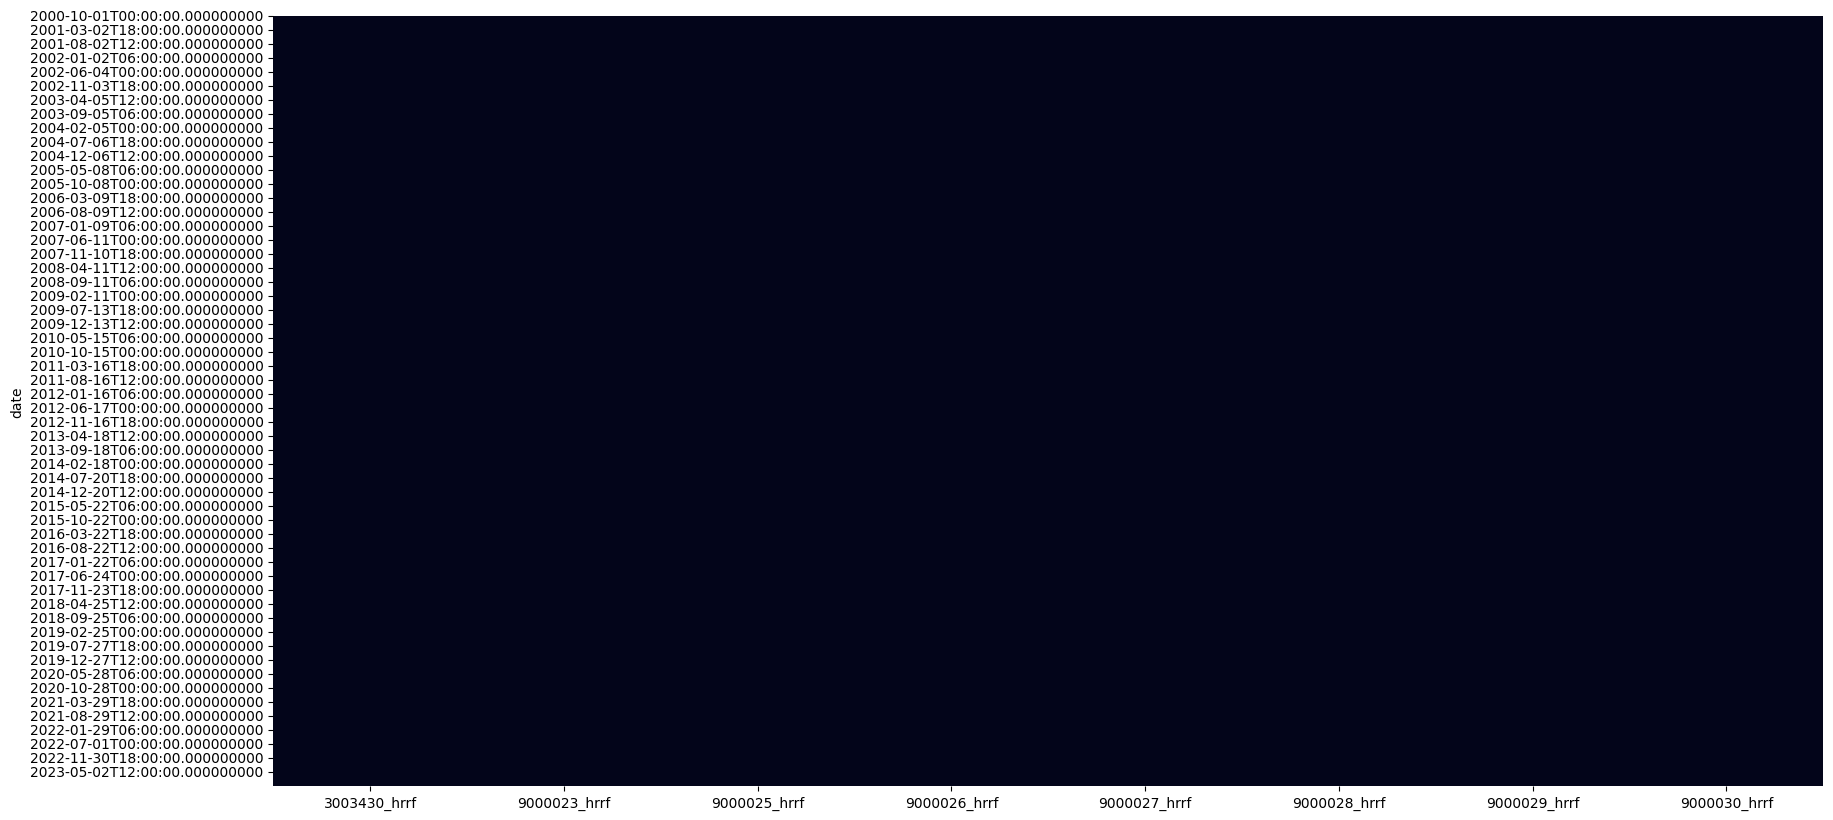

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_rf_df_f_revised.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/hrrf_upstream_missing_hourly_revised.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Plotting Rainfall (that has no missing data) in selected stations </div>

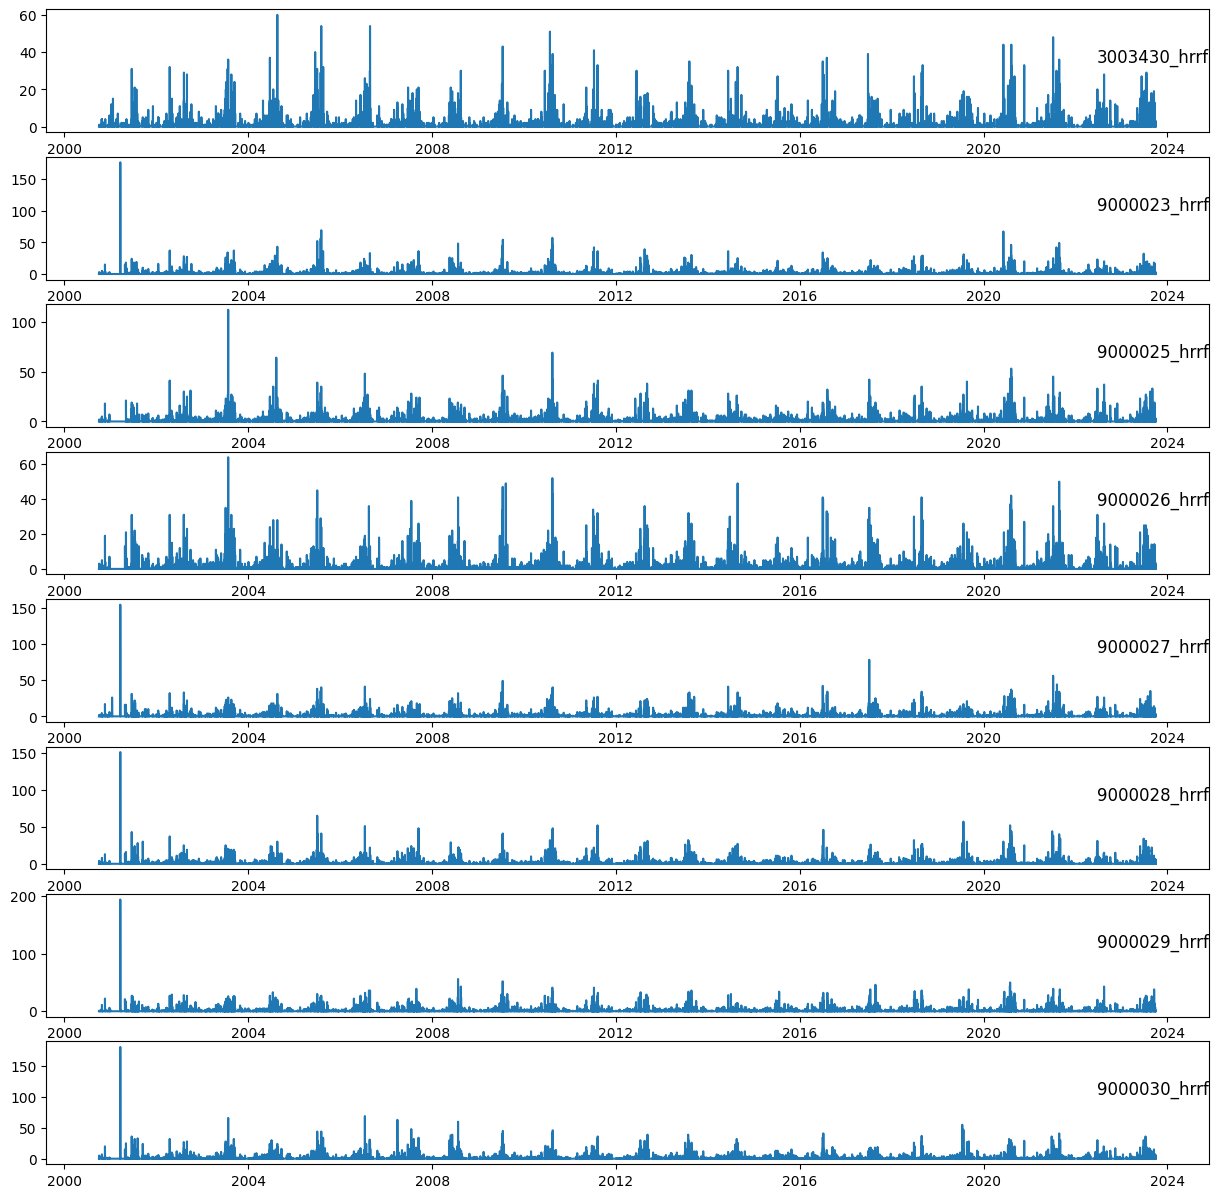

In [19]:
rcParams['figure.figsize'] = 15, 15
values = selected_rf_df_f_revised.values
groups = [*range(0,len(selected_rf_df_f_revised.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_rf_df_f_revised.index,  values[:, group])
    plt.title(selected_rf_df_f_revised.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/hrrf_upstream_ts_hourly_revised.png", bbox_inches='tight')
plt.show()

### 6. Save Hourly Rainfall Data as CSV format

In [20]:
selected_rf_df_f_revised.to_csv(os.getcwd() + "/" + obs_folder_name + "/YD_Dam_Upstream_Rainfall_Hourly_f.csv")

### 7. Creating Model Input using observation data